In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn. metrics import accuracy_score

In [60]:
df=pd.read_csv('loan_data.csv')
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0.0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561.0,No,1
1,21.0,female,High School,12282.0,0.0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504.0,Yes,0
2,NaN,female,High School,12438.0,3.0,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635.0,No,1
3,23.0,female,Bachelor,79753.0,0.0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675.0,No,1
4,24.0,male,Master,66135.0,1.0,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586.0,No,1


In [61]:
df.shape

(45000, 14)

In [62]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0.0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561.0,No,1
1,21.0,female,High School,12282.0,0.0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504.0,Yes,0
2,NaN,female,High School,12438.0,3.0,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635.0,No,1
3,23.0,female,Bachelor,79753.0,0.0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675.0,No,1
4,24.0,male,Master,66135.0,1.0,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586.0,No,1


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      43977 non-null  float64
 1   person_gender                   43061 non-null  object 
 2   person_education                43399 non-null  object 
 3   person_income                   43686 non-null  float64
 4   person_emp_exp                  44290 non-null  float64
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   44243 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    44485 non-null  float64
 12  previous_loan_defaults_on_file  

In [64]:
df.isnull().sum()/len(df)*100

person_age                        2.273333
person_gender                     4.308889
person_education                  3.557778
person_income                     2.920000
person_emp_exp                    1.577778
person_home_ownership             0.000000
loan_amnt                         0.000000
loan_intent                       0.000000
loan_int_rate                     1.682222
loan_percent_income               0.000000
cb_person_cred_hist_length        0.000000
credit_score                      1.144444
previous_loan_defaults_on_file    3.951111
loan_status                       0.000000
dtype: float64

In [65]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,43977.000000,4.368600e+04,44290.000000,45000.000000,44243.000000,45000.000000,45000.000000,44485.000000,45000.000000
mean,27.761353,8.035807e+04,5.403703,9583.157556,11.007575,0.139725,5.867489,632.615421,0.222222
std,6.027566,8.050968e+04,6.060615,6314.886691,2.979366,0.087212,3.879702,50.444675,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.722900e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704950e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.580150e+04,8.000000,12237.250000,13.000000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


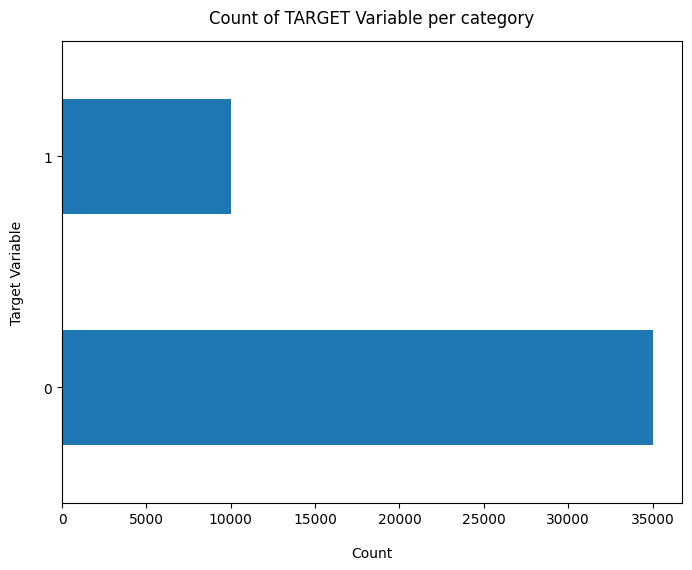

In [66]:
df['loan_status'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02);

In [67]:
df['loan_status'].value_counts()/len(df['loan_status'])*100

loan_status
0    77.777778
1    22.222222
Name: count, dtype: float64

In [68]:
df.isnull().sum()
df.isnull().sum()/len(df)*100


person_age                        2.273333
person_gender                     4.308889
person_education                  3.557778
person_income                     2.920000
person_emp_exp                    1.577778
person_home_ownership             0.000000
loan_amnt                         0.000000
loan_intent                       0.000000
loan_int_rate                     1.682222
loan_percent_income               0.000000
cb_person_cred_hist_length        0.000000
credit_score                      1.144444
previous_loan_defaults_on_file    3.951111
loan_status                       0.000000
dtype: float64

In [69]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0.0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561.0,No,1
1,21.0,female,High School,12282.0,0.0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504.0,Yes,0
2,NaN,female,High School,12438.0,3.0,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635.0,No,1
3,23.0,female,Bachelor,79753.0,0.0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675.0,No,1
4,24.0,male,Master,66135.0,1.0,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586.0,No,1


In [70]:
df.duplicated().sum()


0

In [71]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,43977.000000,4.368600e+04,44290.000000,45000.000000,44243.000000,45000.000000,45000.000000,44485.000000,45000.000000
mean,27.761353,8.035807e+04,5.403703,9583.157556,11.007575,0.139725,5.867489,632.615421,0.222222
std,6.027566,8.050968e+04,6.060615,6314.886691,2.979366,0.087212,3.879702,50.444675,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.722900e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704950e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.580150e+04,8.000000,12237.250000,13.000000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


## UNivarite Anaylsis

In [72]:
X=df.drop(['loan_status'],axis=1)
y=df['loan_status']

In [73]:
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include=['object']).columns


In [74]:
num_cols

Index(['person_age', 'person_income', 'person_emp_exp', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score'],
      dtype='object')

In [75]:
cat_cols

Index(['person_gender', 'person_education', 'person_home_ownership',
       'loan_intent', 'previous_loan_defaults_on_file'],
      dtype='object')

In [76]:
### summary of statistics
X[num_cols].describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score
count,43977.000000,4.368600e+04,44290.000000,45000.000000,44243.000000,45000.000000,45000.000000,44485.000000
mean,27.761353,8.035807e+04,5.403703,9583.157556,11.007575,0.139725,5.867489,632.615421
std,6.027566,8.050968e+04,6.060615,6314.886691,2.979366,0.087212,3.879702,50.444675
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000
25%,24.000000,4.722900e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000
50%,26.000000,6.704950e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000
75%,30.000000,9.580150e+04,8.000000,12237.250000,13.000000,0.190000,8.000000,670.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000


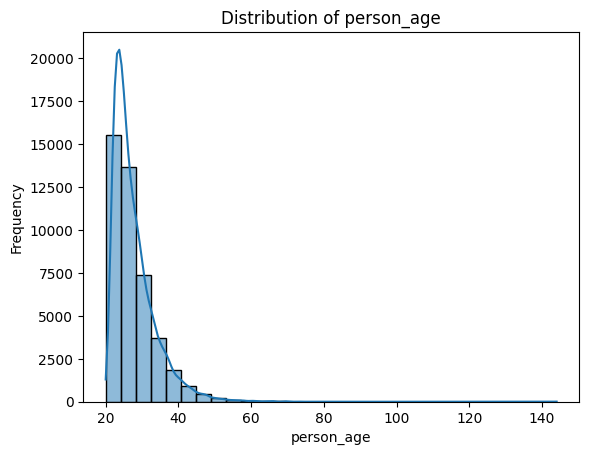

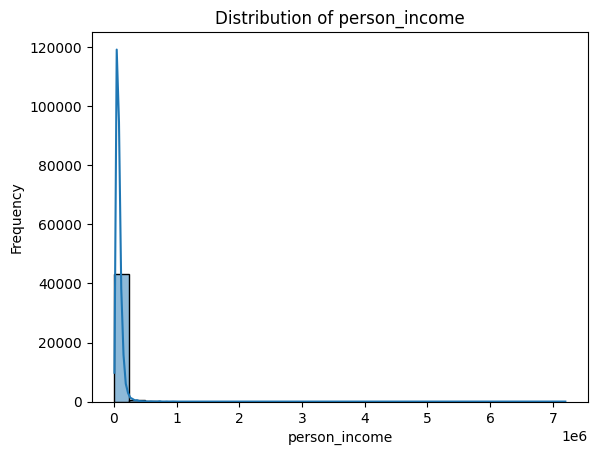

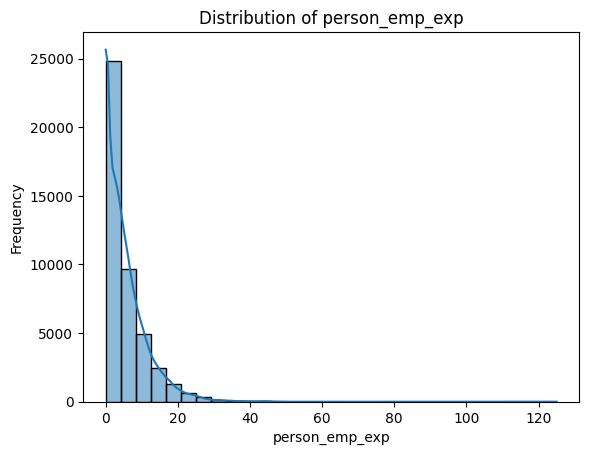

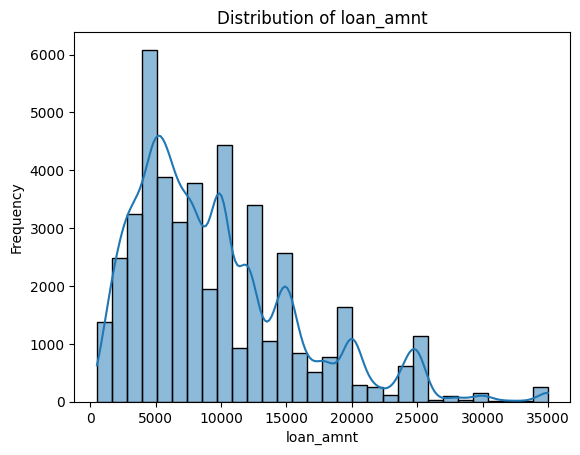

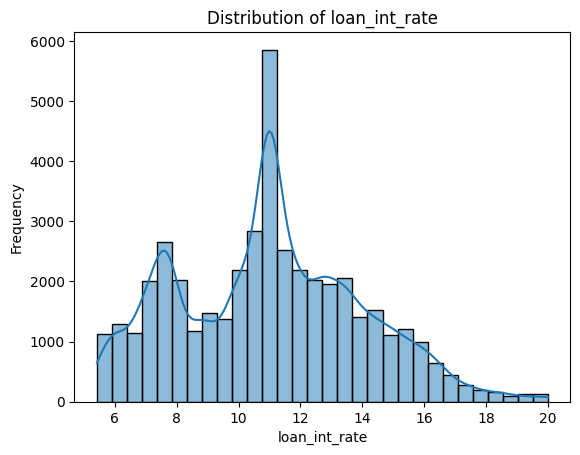

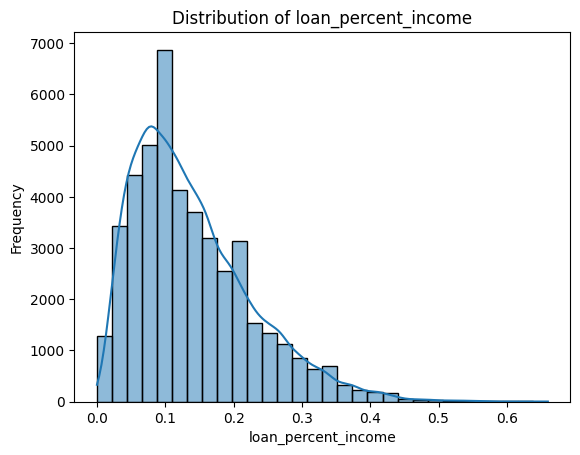

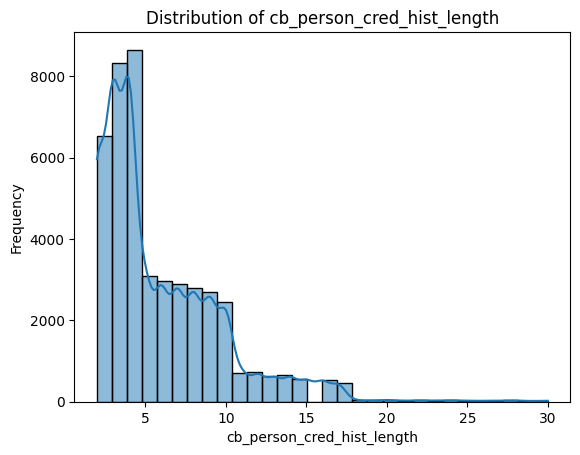

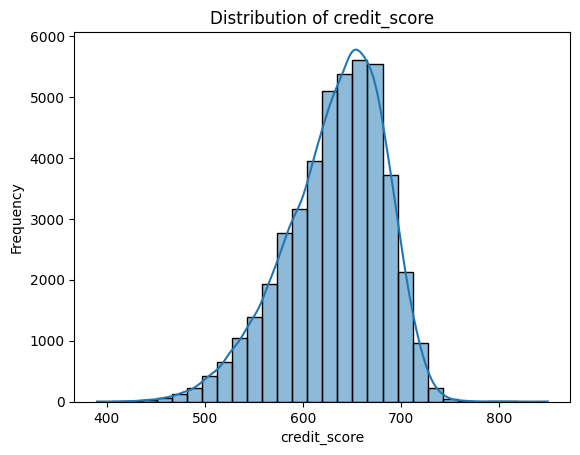

In [77]:
# Histogram distribution
import matplotlib.pyplot as plt
import seaborn as sns

for col in num_cols:
    plt.figure()
    sns.histplot(x=X[col], bins=30,kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


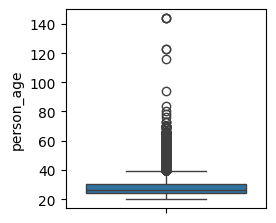

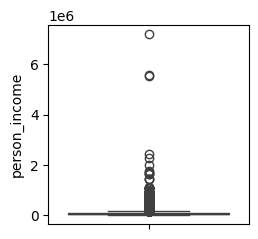

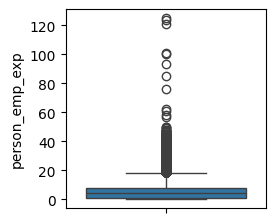

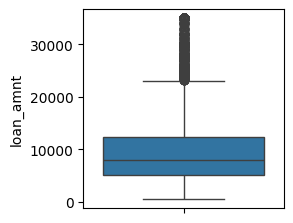

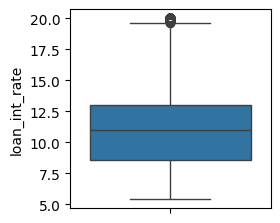

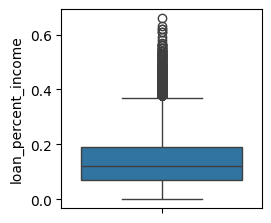

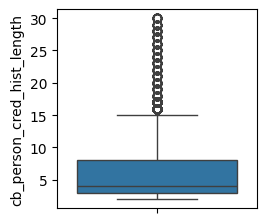

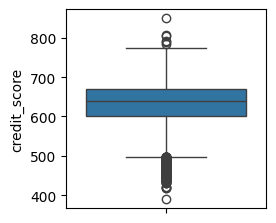

In [78]:
for i,j in  enumerate(num_cols):
    plt.figure(figsize=(15,15))
    plt.subplot(5,5,i+1)
    sns.boxplot(X[j])

In [79]:
for col in num_cols:
    print(col, "Skewness:", X[col].skew())


person_age Skewness: 2.5272608687925913
person_income Skewness: 34.61523989956898
person_emp_exp Skewness: 2.611032106329316
loan_amnt Skewness: 1.1797312856279223
loan_int_rate Skewness: 0.2140317607271464
loan_percent_income Skewness: 1.034512151182724
cb_person_cred_hist_length Skewness: 1.6317199538415355
credit_score Skewness: -0.6111936429235779


In [80]:
## handling Outliers
def cap_outliers(X, col):
    Q1 = X[col].quantile(0.25)
    Q3 = X[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    X[col] = X[col].clip(lower, upper)

for col in num_cols:
    cap_outliers(X, col)


In [81]:
high_skew_cols = [col for col in num_cols if abs(X[col].skew()) > 1]

for col in high_skew_cols:
    cap_outliers(X, col)


In [82]:
import numpy as np

skewed_cols = [
    'person_income',
    'person_emp_exp',
    'cb_person_cred_hist_length',
    'loan_percent_income',
    'loan_amnt'
]

for col in skewed_cols:
    X[col] = np.log1p(X[col])


In [83]:
for col in skewed_cols:
    print(col, X[col].skew())


person_income -0.282742397244846
person_emp_exp -0.20484773779195672
cb_person_cred_hist_length 0.34550980471964154
loan_percent_income 0.6792705646836117
loan_amnt -0.5190283002203198


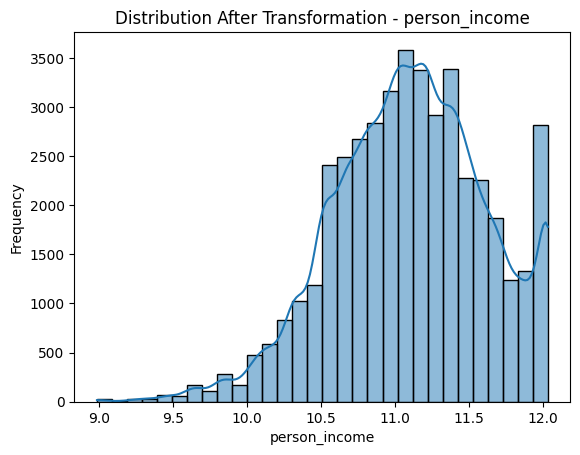

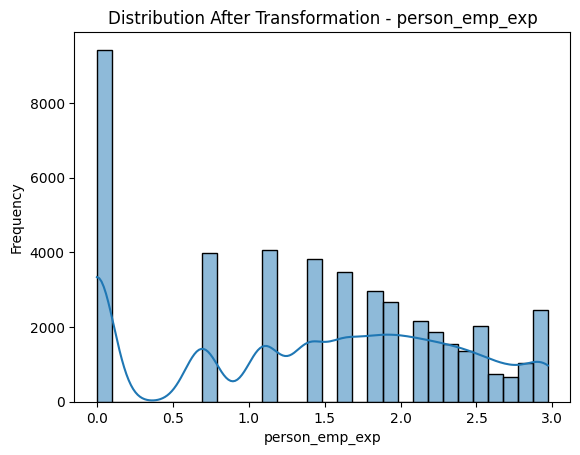

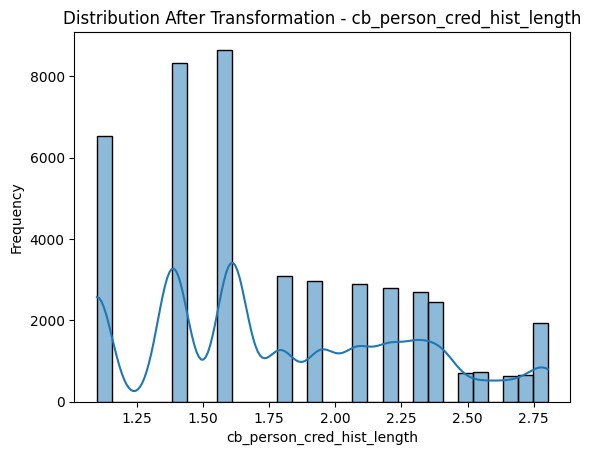

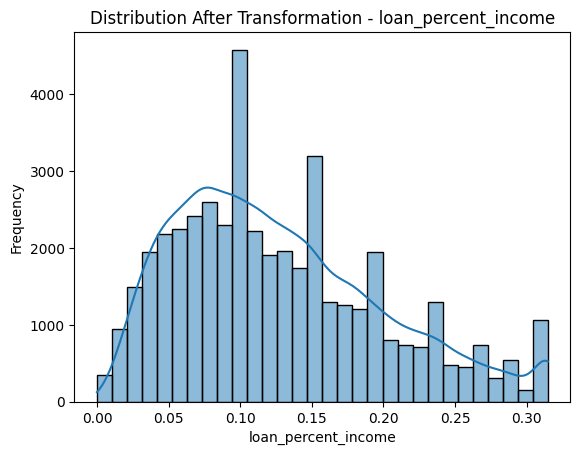

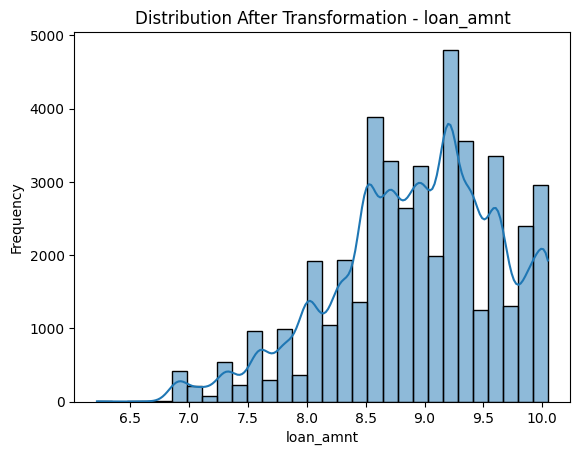

In [84]:
# seeing after ditrsubtion
import matplotlib.pyplot as plt
import seaborn as sns

for col in skewed_cols:
    plt.figure()
    sns.histplot(X[col], bins=30, kde=True)
    plt.title(f'Distribution After Transformation - {col}')
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


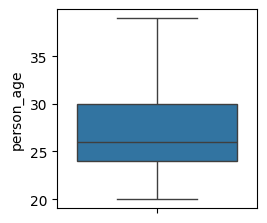

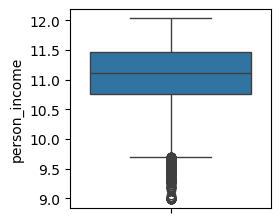

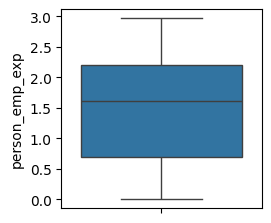

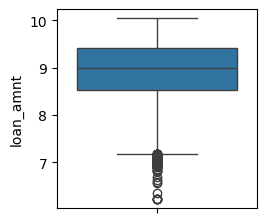

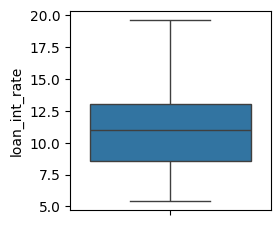

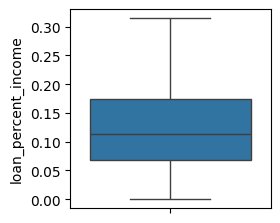

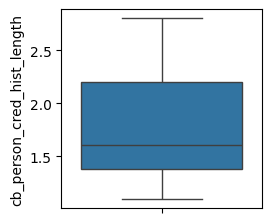

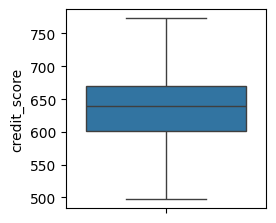

In [85]:
# checking whaether we handled Outliers
for i,j in  enumerate(num_cols):
    plt.figure(figsize=(15,15))
    plt.subplot(5,5,i+1)
    sns.boxplot(X[j])

In [86]:
## for categorical 
for col in cat_cols:
    print(f"----- {col} (%) -----")
    print(X[col].value_counts(normalize=True) * 100)
    print()


----- person_gender (%) -----
person_gender
male      55.142705
female    44.857295
Name: proportion, dtype: float64

----- person_education (%) -----
person_education
Bachelor       29.844006
Associate      26.737943
High School    26.514436
Master         15.521095
Doctorate       1.382520
Name: proportion, dtype: float64

----- person_home_ownership (%) -----
person_home_ownership
RENT        52.095556
MORTGAGE    41.086667
OWN          6.557778
OTHER        0.260000
Name: proportion, dtype: float64

----- loan_intent (%) -----
loan_intent
EDUCATION            20.340000
MEDICAL              18.995556
VENTURE              17.375556
PERSONAL             16.782222
DEBTCONSOLIDATION    15.877778
HOMEIMPROVEMENT      10.628889
Name: proportion, dtype: float64

----- previous_loan_defaults_on_file (%) -----
previous_loan_defaults_on_file
Yes    50.754246
No     49.245754
Name: proportion, dtype: float64



In [87]:
X['person_home_ownership'] = X['person_home_ownership'].replace('OTHER', 'RENT')


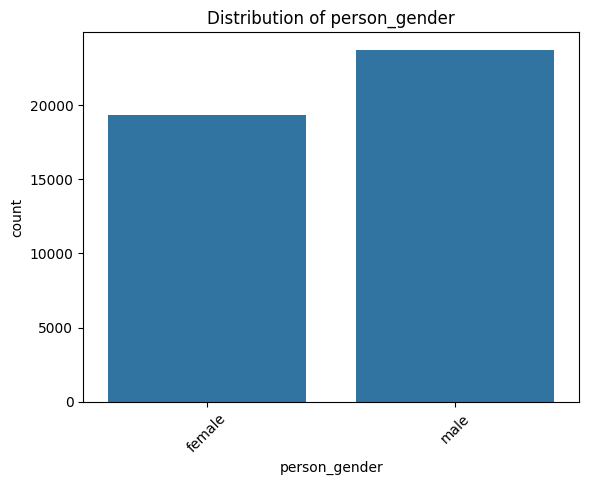

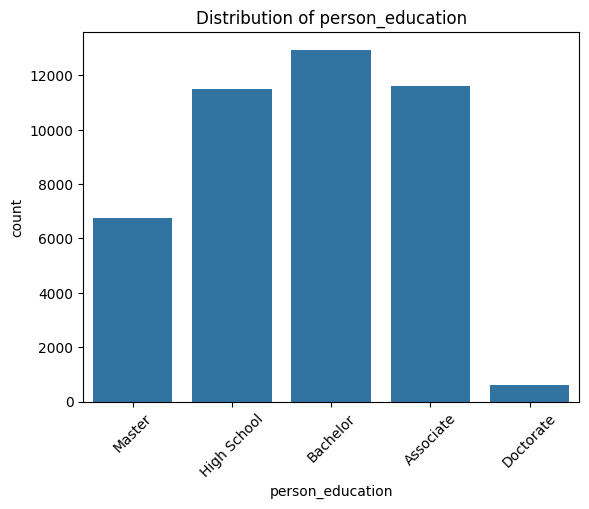

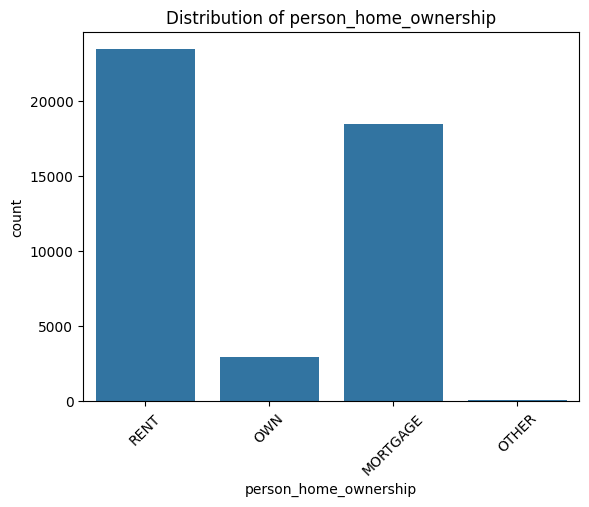

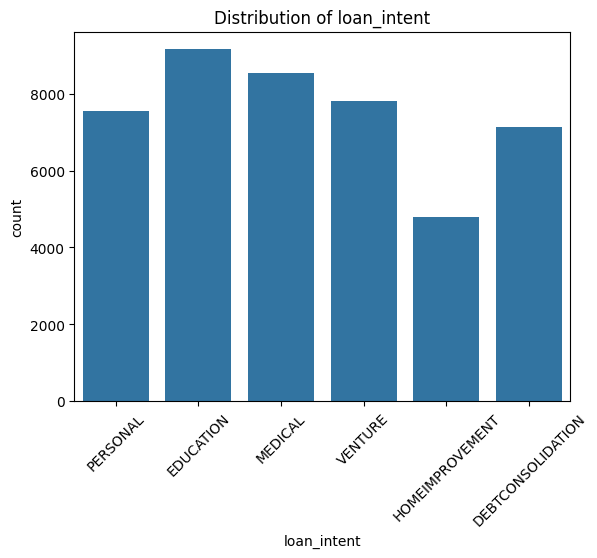

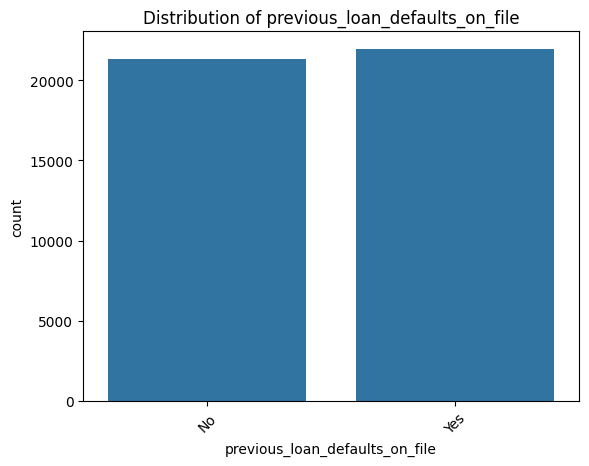

In [88]:
for col in cat_cols:
    plt.figure()
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()


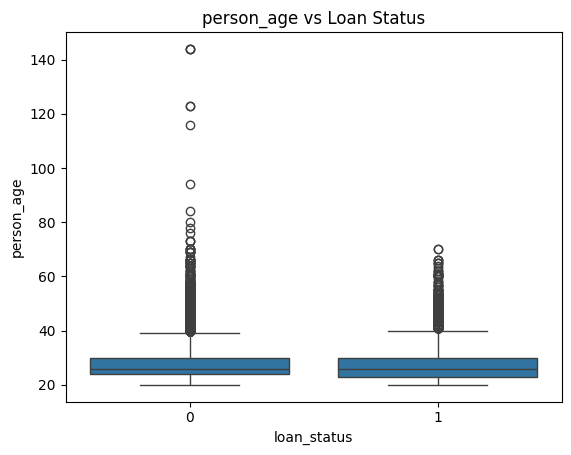

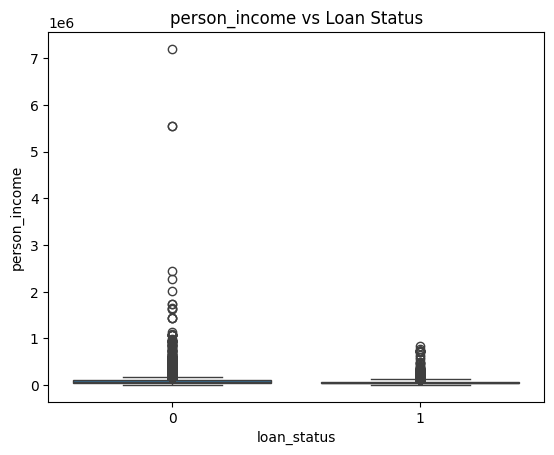

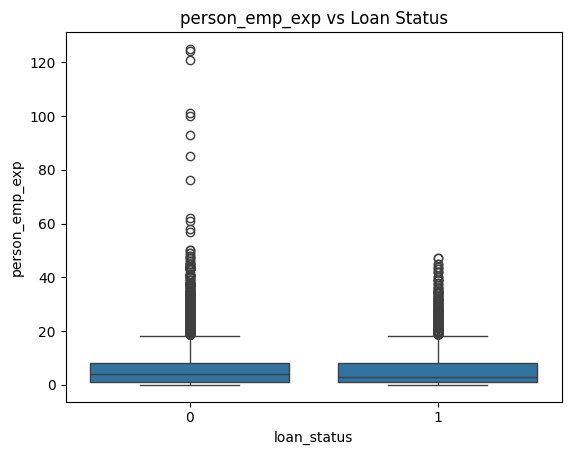

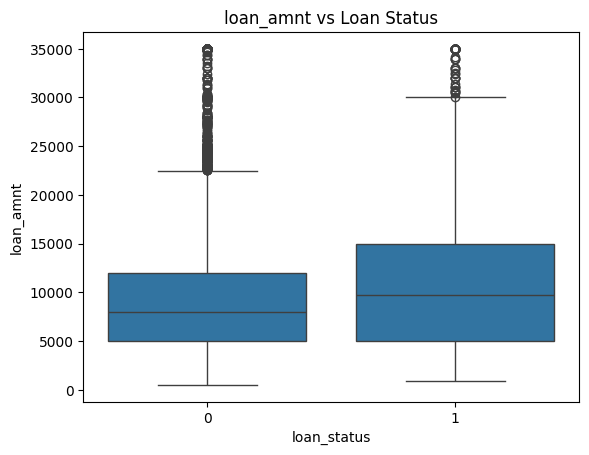

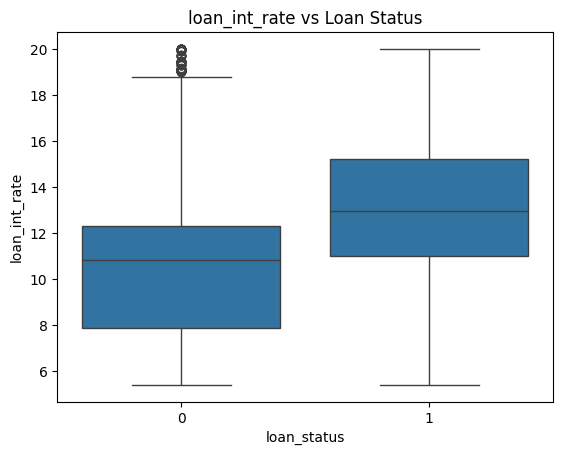

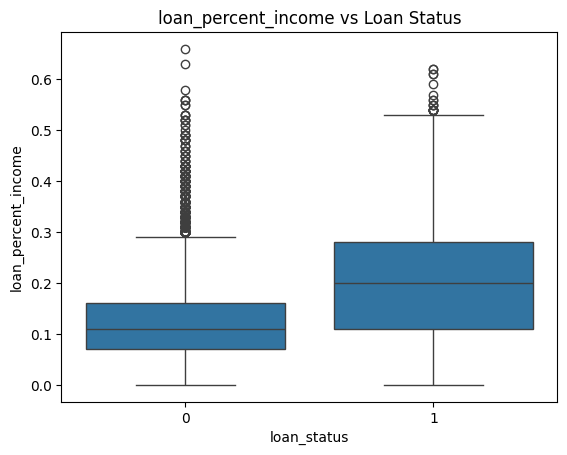

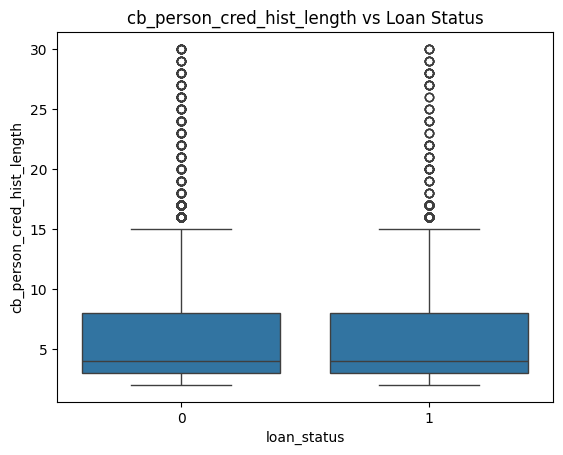

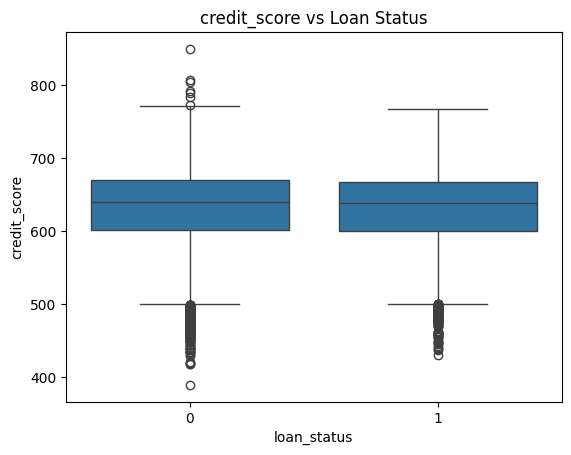

In [89]:
## Bivarite analysis
import seaborn as sns
import matplotlib.pyplot as plt

for col in num_cols:
    plt.figure()
    sns.boxplot(x='loan_status', y=col, data=df)
    plt.title(f'{col} vs Loan Status')
    plt.show()


In [90]:
df.groupby('loan_status')[num_cols].mean()


,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score
loan_status,,,,,,,,
0,27.828158,86203.336397,5.469311,9219.576914,10.478434,0.121783,5.898286,632.832534
1,27.527667,59972.585208,5.174249,10855.689800,12.857578,0.202521,5.759700,631.854481


In [91]:
for col in cat_cols:
    print(f"\n----- {col} vs loan_status -----")
    print(pd.crosstab(X[col], y, normalize='index') * 100)



----- person_gender vs loan_status -----
loan_status            0          1
person_gender                      
female         77.707600  22.292400
male           77.847968  22.152032

----- person_education vs loan_status -----
loan_status               0          1
person_education                      
Associate         77.955877  22.044123
Bachelor          77.424336  22.575664
Doctorate         77.166667  22.833333
High School       77.578865  22.421135
Master            78.236342  21.763658

----- person_home_ownership vs loan_status -----
loan_status                    0          1
person_home_ownership                      
MORTGAGE               88.403916  11.596084
OWN                    92.477126   7.522874
RENT                   67.597623  32.402377

----- loan_intent vs loan_status -----
loan_status                0          1
loan_intent                            
DEBTCONSOLIDATION  69.727082  30.272918
EDUCATION          83.043811  16.956189
HOMEIMPROVEMENT    73.6985

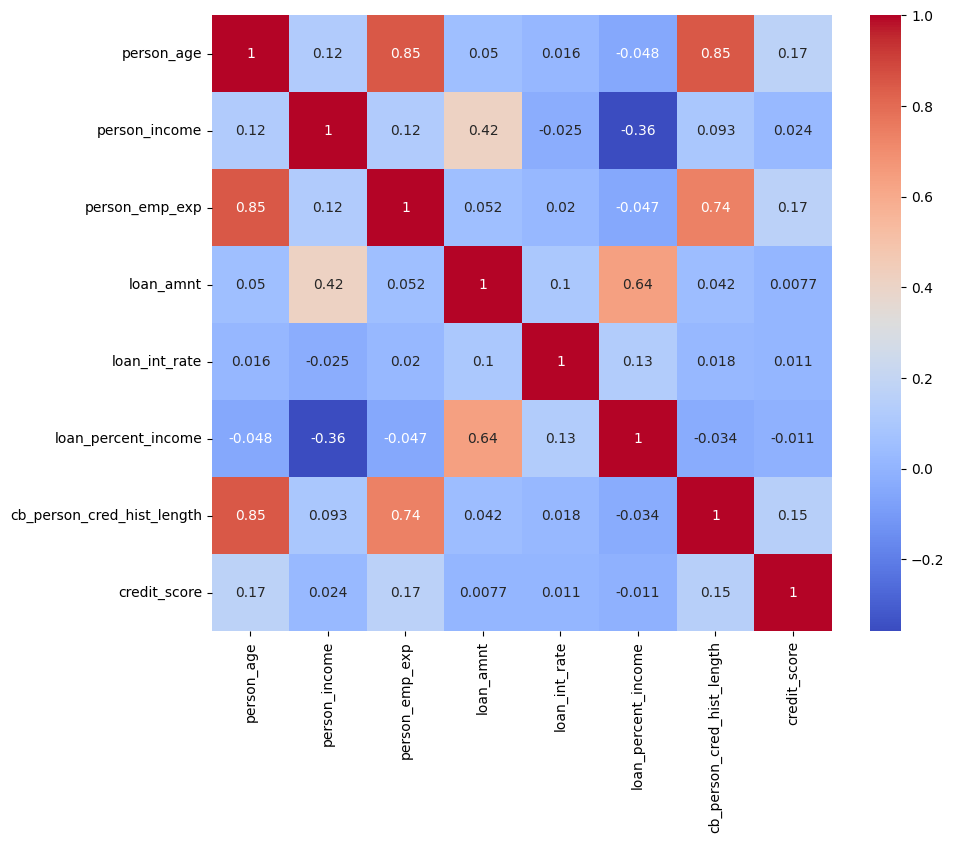

In [92]:
plt.figure(figsize=(10,8))
sns.heatmap(X[num_cols].corr(), annot=True, cmap='coolwarm')
plt.show()


### Anaylsis

In [93]:
df_bi = X.copy()
df_bi['loan_status'] = y


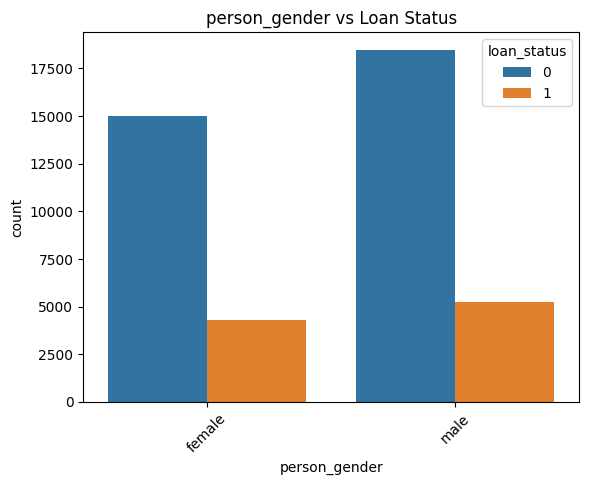

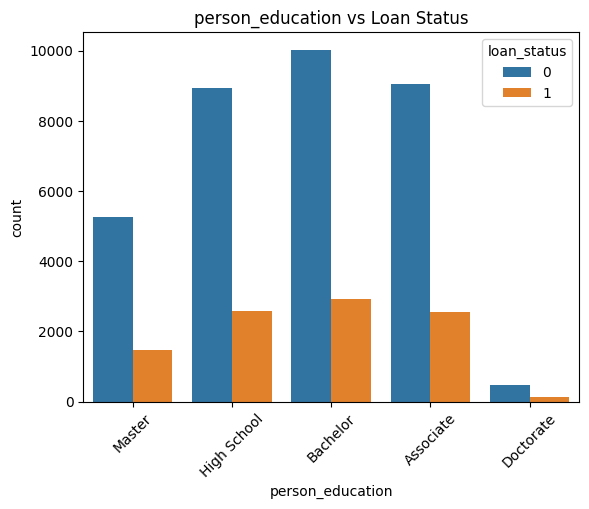

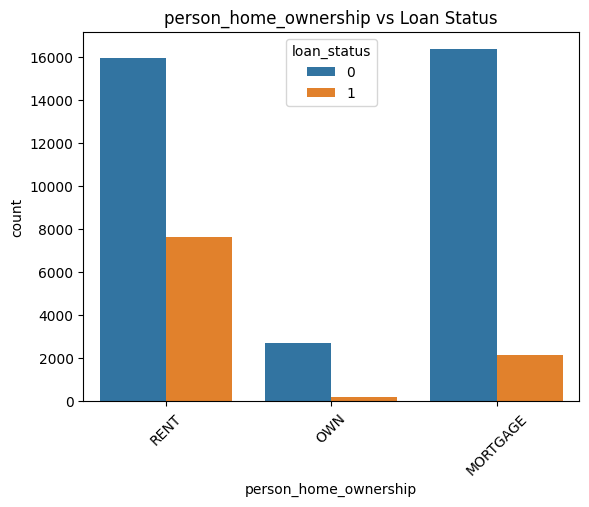

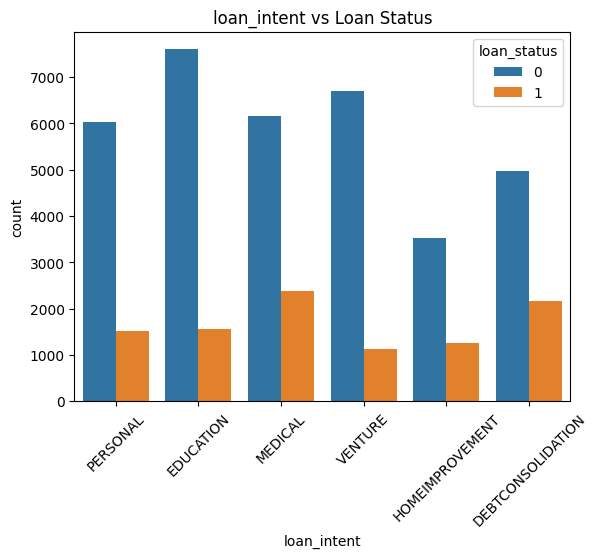

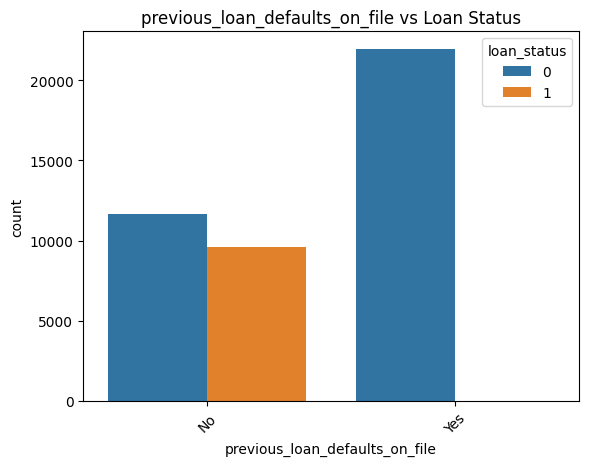

In [94]:

import seaborn as sns
import matplotlib.pyplot as plt

for col in cat_cols:
    plt.figure()
    sns.countplot(data=df_bi, x=col, hue='loan_status')
    plt.title(f'{col} vs Loan Status')
    plt.xticks(rotation=45)
    plt.show()


In [95]:
X.isnull().sum()

person_age                        1023
person_gender                     1939
person_education                  1601
person_income                     1314
person_emp_exp                     710
person_home_ownership                0
loan_amnt                            0
loan_intent                          0
loan_int_rate                      757
loan_percent_income                  0
cb_person_cred_hist_length           0
credit_score                       515
previous_loan_defaults_on_file    1778
dtype: int64

In [96]:
X.head(2)

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file
0,22.0,female,Master,11.183713,0.0,RENT,10.047334,PERSONAL,16.02,0.314811,1.386294,561.0,No
1,21.0,female,High School,9.415971,0.0,OWN,6.908755,EDUCATION,11.14,0.076961,1.098612,504.0,Yes


In [97]:
X.columns

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file'],
      dtype='object')

In [98]:
df['loan_status'].value_counts(normalize=True)


loan_status
0    0.777778
1    0.222222
Name: proportion, dtype: float64

In [99]:
import pandas as pd

df_= pd.concat([X, y], axis=1)


In [100]:
df_.head(2)

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,11.183713,0.0,RENT,10.047334,PERSONAL,16.02,0.314811,1.386294,561.0,No,1
1,21.0,female,High School,9.415971,0.0,OWN,6.908755,EDUCATION,11.14,0.076961,1.098612,504.0,Yes,0


In [101]:
n=df_.select_dtypes(include='number').columns
c=df_.select_dtypes(include='object').columns

In [102]:
for col in n:
    print(col, df_[col].skew())

person_age 0.915095342323541
person_income -0.282742397244846
person_emp_exp -0.20484773779195672
loan_amnt -0.5190283002203198
loan_int_rate 0.20786293314185347
loan_percent_income 0.6792705646836117
cb_person_cred_hist_length 0.34550980471964154
credit_score -0.5336111641017156
loan_status 1.3363507549997484


In [105]:
df_.tail(10)

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
44990,31.0,male,Master,11.826516,2.302585,RENT,9.418979,PERSONAL,16.92,0.086178,2.079442,722.0,No,1
44991,24.0,male,High School,10.539720,0.000000,MORTGAGE,9.510519,EDUCATION,13.43,0.307485,1.609438,612.0,No,1
44992,23.0,female,Bachelor,10.619521,0.000000,RENT,9.105091,PERSONAL,11.01,0.198851,1.609438,497.5,No,1
44993,27.0,female,High School,10.477654,1.609438,RENT,8.517393,PERSONAL,15.83,0.131028,1.791759,505.0,No,1
44994,24.0,female,Associate,10.371145,1.098612,RENT,9.411647,MEDICAL,10.70,0.314811,1.609438,678.0,No,1
44995,27.0,male,Associate,10.778373,1.945910,RENT,9.615872,MEDICAL,15.66,0.270027,1.386294,645.0,No,1
44996,37.0,female,Associate,11.094390,2.890372,RENT,9.105091,HOMEIMPROVEMENT,14.07,0.131028,2.484907,621.0,No,1
44997,33.0,male,Associate,10.949806,2.079442,RENT,7.927324,DEBTCONSOLIDATION,10.02,0.048790,2.397895,668.0,No,1
44998,29.0,male,Bachelor,10.409250,1.609438,RENT,9.392745,EDUCATION,13.23,0.307485,1.945910,604.0,No,1
44999,24.0,male,High School,10.851471,0.693147,RENT,8.804775,DEBTCONSOLIDATION,17.05,0.122218,1.386294,628.0,No,1


In [106]:
df_.to_csv('loan_cleaned_dataset_.csv', index=False)
